## Import thư viện

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.spatial.distance import cdist
import random

## Dataset

In [21]:
df = pd.read_csv("https://raw.githubusercontent.com/lnduongg/KhaiPhaDuLieu/main/earthquake_1995-2023.csv")
df.head(10)


,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 6.5 - 42 km W of Sola, Vanuatu",6.5,16-08-2023 12:47,7,4,green,0,657,us,114,7.177000,25.0,mww,192.955,-13.8814,167.1580,"Sola, Vanuatu",NaN,Vanuatu
1,"M 6.5 - 43 km S of Intipucá, El Salvador",6.5,19-07-2023 00:22,8,6,yellow,0,775,us,92,0.679000,40.0,mww,69.727,12.8140,-88.1265,"Intipucá, El Salvador",NaN,NaN
2,"M 6.6 - 25 km ESE of Loncopué, Argentina",6.6,17-07-2023 03:05,7,5,green,0,899,us,70,1.634000,28.0,mww,171.371,-38.1911,-70.3731,"Loncopué, Argentina",South America,Argentina
3,"M 7.2 - 98 km S of Sand Point, Alaska",7.2,16-07-2023 06:48,6,6,green,1,860,us,173,0.907000,36.0,mww,32.571,54.3844,-160.6990,"Sand Point, Alaska",NaN,NaN
4,M 7.3 - Alaska Peninsula,7.3,16-07-2023 06:48,0,5,NaN,1,820,at,79,0.879451,172.8,Mi,21.000,54.4900,-160.7960,Alaska Peninsula,NaN,NaN
5,"M 6.6 - 277 km NNE of Codrington, Antigua and ...",6.6,10-07-2023 20:28,5,4,green,1,802,us,95,2.454000,37.0,mww,10.000,20.0196,-61.0955,"Codrington, Antigua and Barbuda",NaN,NaN
6,M 6.9 - Tonga,6.9,02-07-2023 10:27,4,4,green,1,741,us,136,1.179000,23.0,mww,229.000,-17.8530,-174.9370,Tonga,NaN,NaN
7,M 7.2 - south of the Fiji Islands,7.2,15-06-2023 18:06,8,6,green,1,804,us,85,2.590000,24.0,mww,167.404,-22.9824,-177.2080,the Fiji Islands,NaN,NaN
8,M 6.6 - Panama-Colombia border region,6.6,25-05-2023 03:05,6,6,green,1,733,us,50,2.163000,129.0,mww,10.000,8.8894,-77.1231,Panama-Colombia border region,NaN,Colombia
9,M 7.1 - southeast of the Loyalty Islands,7.1,20-05-2023 01:51,3,4,green,1,777,us,98,2.812000,56.0,mww,35.981,-23.0622,170.4560,the Loyalty Islands,NaN,NaN


## Vẽ biểu đồ k-distance plot

#### Tính khoảng cách

In [22]:
points = df[['latitude','longitude']].values

dist_matrix = np.round(cdist(points, points), 3)
np.fill_diagonal(dist_matrix, np.inf)
df = pd.DataFrame(dist_matrix)
df.head(15)

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,inf,256.676,238.772,334.889,335.005,230.757,342.118,344.486,245.340,9.755,...,18.070,237.640,76.837,6.050,154.020,70.821,9.530,42.390,155.173,49.548
1,256.676,inf,54.007,83.635,83.772,27.975,92.068,96.005,11.682,261.059,...,240.291,40.313,187.546,259.439,113.336,234.360,260.501,214.304,113.172,213.424
2,238.772,54.007,inf,129.341,129.484,58.945,106.523,107.912,47.562,241.304,...,224.381,14.851,179.924,240.384,120.214,231.738,240.752,197.760,120.887,202.161
3,334.889,83.635,129.341,inf,0.143,105.365,73.627,79.109,95.156,340.091,...,317.781,119.223,261.909,338.166,183.679,303.531,339.537,292.636,182.949,289.029
4,335.005,83.772,129.484,0.143,inf,105.491,73.712,79.192,95.292,340.209,...,317.896,119.365,262.018,338.284,183.785,303.629,339.655,292.753,183.054,289.140
5,230.757,27.975,58.945,105.365,105.491,inf,119.976,123.820,19.513,235.525,...,214.058,44.325,160.303,233.755,85.381,206.513,234.969,188.375,85.202,186.539
6,342.118,92.068,106.523,73.627,73.712,119.976,inf,5.610,101.404,345.432,...,326.711,104.787,277.010,344.228,205.086,325.487,344.876,300.214,205.008,301.777
7,344.486,96.005,107.912,79.109,79.192,123.820,5.610,inf,105.037,347.664,...,329.223,106.915,280.035,346.512,208.721,328.846,347.108,302.688,208.682,304.594
8,245.340,11.682,47.562,95.156,95.292,19.513,101.404,105.037,inf,249.632,...,229.050,32.945,176.803,248.045,103.694,224.257,249.074,202.986,103.644,202.455
9,9.755,261.059,241.304,340.091,340.209,235.525,345.432,347.664,249.632,inf,...,26.286,240.750,84.294,3.707,160.415,80.576,0.559,47.648,161.634,57.559


#### Cài đặt chỉ số

In [23]:
min_pts = 4
k = min_pts - 1

#### Sắp xếp khoảng cách

In [24]:
k_distances = np.sort(dist_matrix, axis=1)[:, k-1]
sorted_k = np.sort(k_distances)


#### Vẽ biểu đồ k-distance plot

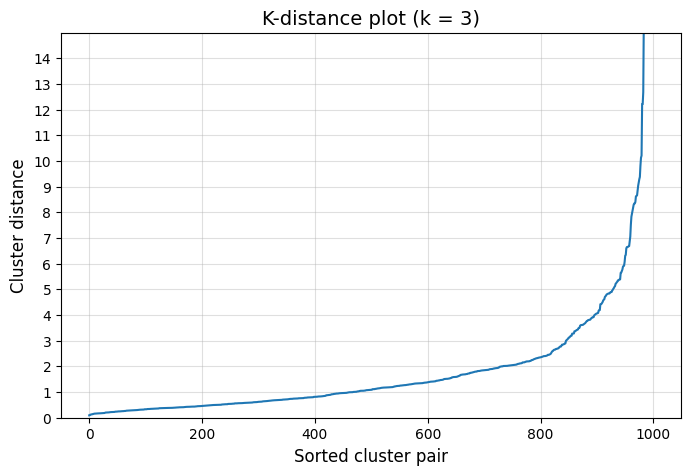

In [25]:
plt.figure(figsize=(8,5))
plt.plot(sorted_k)
plt.xlabel("Sorted cluster pair", fontsize=12)
plt.ylabel("Cluster distance", fontsize=12)
plt.title(f"K-distance plot (k = {k})", fontsize=14)
plt.ylim(0, 15)
plt.yticks(np.arange(0, 15, 1))
plt.grid(True, alpha=0.4)
plt.show()

In [26]:
eps = 7

## Vẽ biểu đồ DBSCAN


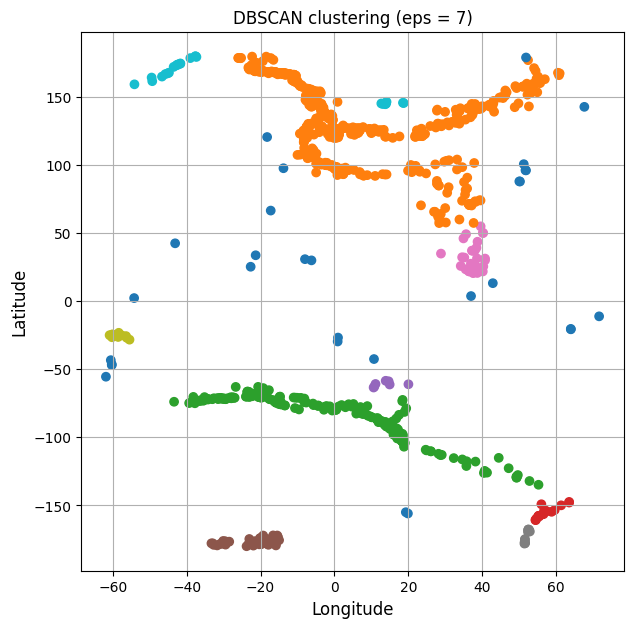

KẾT QUẢ DBSCAN
- Số cluster tìm được: 10
- Số điểm nhiễu (noise): 30
- Tổng số điểm dữ liệu: 1000


In [27]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=eps, min_samples=min_pts)
labels = db.fit_predict(points)

plt.figure(figsize=(7,7))
plt.scatter(points[:,0], points[:,1], c=labels, cmap='tab10')
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)
plt.title(f"DBSCAN clustering (eps = {eps})")
plt.grid(True)
plt.show()

# Số cụm tìm được
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

# Số điểm nhiễu
n_noise = np.sum(labels == -1)

print("KẾT QUẢ DBSCAN")
print(f"- Số cluster tìm được: {n_clusters}")
print(f"- Số điểm nhiễu (noise): {n_noise}")
print(f"- Tổng số điểm dữ liệu: {len(points)}")